In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
  
%matplotlib inline

In [2]:
df=pd.read_csv('fatal-police-shootings-data.csv')
df.shape

(5416, 14)

In [3]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5416.0,3010.398264,1695.786456,3.0,1545.75,3009.5,4486.25,5927.0
age,5181.0,37.117931,13.116135,6.0,27.00,35.0,46.00,91.0


In [6]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [7]:
df.columns.values

array(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'], dtype=object)

In [8]:
print(df.isnull().sum())
if(any(list(df.isnull().sum())) !=0):
    print("--------------------------")
    print("We have null values")
else:
    print("--------------------------")
    print("We don't have null values")

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64
--------------------------
We have null values


This shows the columns where the values are not empty. These rows can be discarded or filled with an appropriate value.

In [9]:
import seaborn as sns
from matplotlib import gridspec
import matplotlib.cm as cm

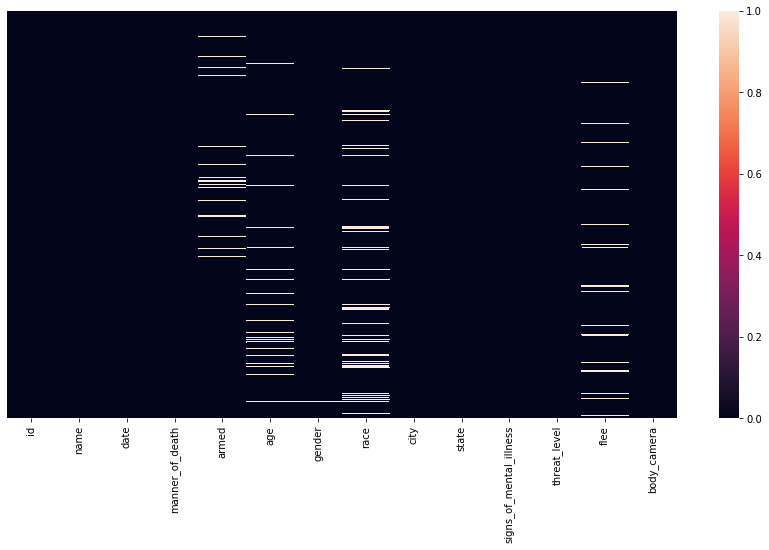

In [10]:
fig, ax = plt.subplots(figsize=(15,7.5))   
sns.heatmap(df.isnull(),yticklabels=False, ax=ax)

The heatmap for the values that are missing in the columns. This figure shows where more values are missing from starting to the end.

In [11]:
df =df.dropna(how='any')
df.shape

(4399, 14)

In [12]:
df.isna().any()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool

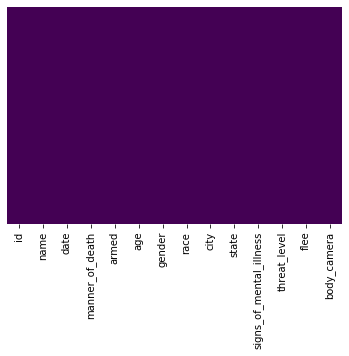

In [13]:
#Verifying null values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [14]:
df.groupby("race").count()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
A,83,83,83,83,83,83,83,83,83,83,83,83,83
B,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164
H,786,786,786,786,786,786,786,786,786,786,786,786,786
N,70,70,70,70,70,70,70,70,70,70,70,70,70
O,43,43,43,43,43,43,43,43,43,43,43,43,43
W,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253,2253


Collection of DataFrame by race.

In [15]:
df.replace(to_replace = ['A'], value = ['Asian'], inplace = True)
df.replace(to_replace = ['B'], value = ['Black Non-Hispanic'], inplace = True)
df.replace(to_replace = ['H'], value = ['Hispanic'], inplace = True)
df.replace(to_replace = ['N'], value = ['Native American'], inplace = True)
df.replace(to_replace = ['O'], value = ['Other'], inplace = True)
df.replace(to_replace = ['W'], value = ['White Non-Hispanic'], inplace = True)

Changing values from Abbreviations to actual variety names is considerably easier to read this way.

In [16]:
df.groupby("gender").count()

,id,name,date,manner_of_death,armed,age,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
gender,,,,,,,,,,,,,
F,197,197,197,197,197,197,197,197,197,197,197,197,197
M,4202,4202,4202,4202,4202,4202,4202,4202,4202,4202,4202,4202,4202


Collection of DataFrame by Gender.

In [17]:
df.groupby("body_camera").count()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee
body_camera,,,,,,,,,,,,,
False,3869,3869,3869,3869,3869,3869,3869,3869,3869,3869,3869,3869,3869
True,530,530,530,530,530,530,530,530,530,530,530,530,530


Collection of DataFrame by Body Camera.

In [18]:
df["armed"].value_counts()

gun                       2596
knife                      660
unarmed                    336
toy weapon                 165
vehicle                    117
                          ... 
nail gun                     1
bean-bag gun                 1
baseball bat and knife       1
stapler                      1
pen                          1
Name: armed, Length: 90, dtype: int64

Set of DataFrame by the weapon being held.

In [19]:
df["threat_level"].value_counts()

attack          2911
other           1322
undetermined     166
Name: threat_level, dtype: int64

Set of DataFrame by threat level.

In [20]:
df['manner_of_death'].value_counts()

shot                4169
shot and Tasered     230
Name: manner_of_death, dtype: int64

Grouping of DataFrame by manner of death.



In [21]:
df['flee'].value_counts()

Not fleeing    2965
Car             657
Foot            630
Other           147
Name: flee, dtype: int64

Grouping of DataFrame by the attempt to flee.



In [22]:
df['age'].value_counts()

25.0    160
31.0    158
27.0    152
33.0    149
29.0    149
       ... 
79.0      1
12.0      1
13.0      1
78.0      1
91.0      1
Name: age, Length: 75, dtype: int64

Grouping of DataFrame by Age.

In [23]:
df['signs_of_mental_illness'].value_counts()

False    3361
True     1038
Name: signs_of_mental_illness, dtype: int64

Grouping of DataFrame by mental illness.



In [24]:
df['date'].value_counts()

2018-01-06    9
2017-01-24    8
2019-01-28    8
2015-07-07    8
2018-04-05    8
             ..
2017-05-22    1
2018-03-26    1
2019-05-16    1
2018-09-04    1
2015-06-29    1
Name: date, Length: 1733, dtype: int64

Grouping of DataFrame by the date where they have taken place.

In [25]:
df['date'] = df['date'].apply(str)
df[['Year','Month','Day']] = df.date.apply(   lambda x: pd.Series(str(x).split("-")))
df.drop(['Month','Day','date'],axis = 'columns',inplace = True)
df['Year'] = df['Year'].apply(int)

Conversion of date to the particular year only. Removal of dates and months takes place to make it easier to categorize.

In [26]:
df.head()

,id,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,Year
0,3,Tim Elliot,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015
1,4,Lewis Lee Lembke,shot,gun,47.0,M,White Non-Hispanic,Aloha,OR,False,attack,Not fleeing,False,2015
2,5,John Paul Quintero,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015
3,8,Matthew Hoffman,shot,toy weapon,32.0,M,White Non-Hispanic,San Francisco,CA,True,attack,Not fleeing,False,2015
4,9,Michael Rodriguez,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015


This Data shows the Date being dropped from the DataFrame and Year being added at the end.

In [27]:
df['Year'].value_counts()

2015    895
2016    820
2018    800
2017    784
2019    764
2020    336
Name: Year, dtype: int64

Set of DataFrame by cases in years.

In [28]:
df['city'].value_counts()

Los Angeles    62
Phoenix        60
Houston        45
Las Vegas      38
San Antonio    34
               ..
Clayton         1
Humboldt        1
Lake Mary       1
Cheney          1
Roosevelt       1
Name: city, Length: 2116, dtype: int64

Grouping of DataFrame by City.

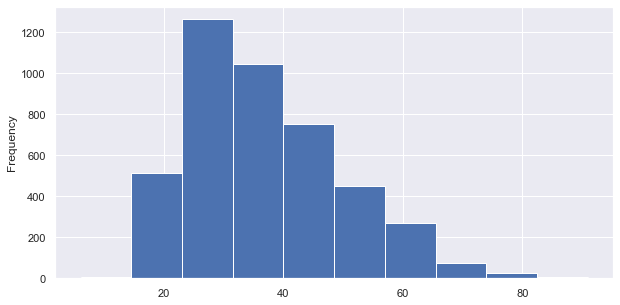

In [29]:
sns.set(rc={'figure.figsize':(10,5)})
df["age"].plot.hist()

This figure shows the age of the people killed. According to the data, the 20-40 age span has the highest cases.

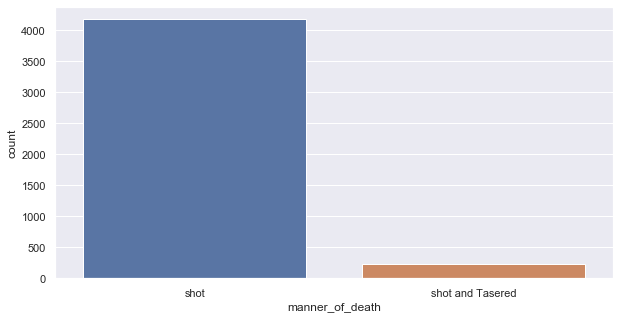

In [30]:
sns.countplot(x = "manner_of_death", data = df)

The manner of death of the people.



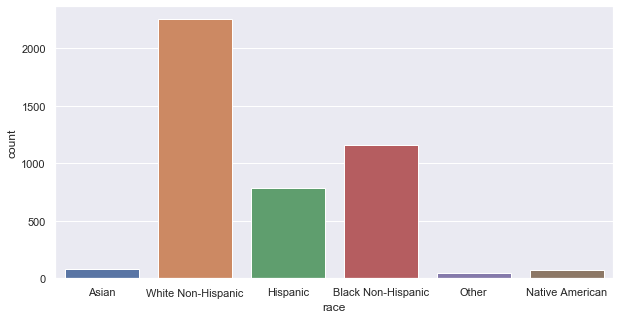

In [31]:
sns.countplot(x = "race", data = df)

The gender of the people killed.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

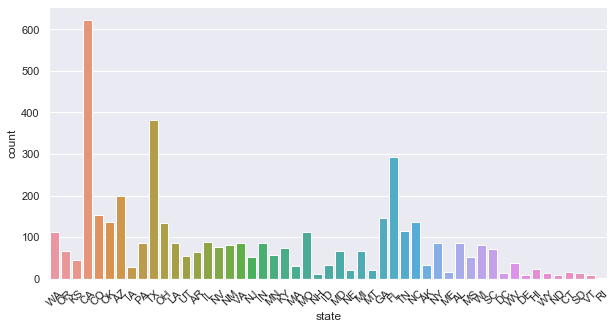

In [32]:
sns.countplot(x = "state", data = df)
plt.xticks(rotation=45)


The states where the shootings happened.

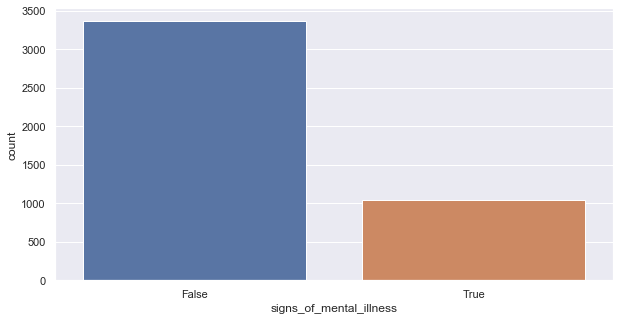

In [33]:
sns.countplot(x = "signs_of_mental_illness", data = df)

This figure shows whether the people shot displayed signs of mental illness.

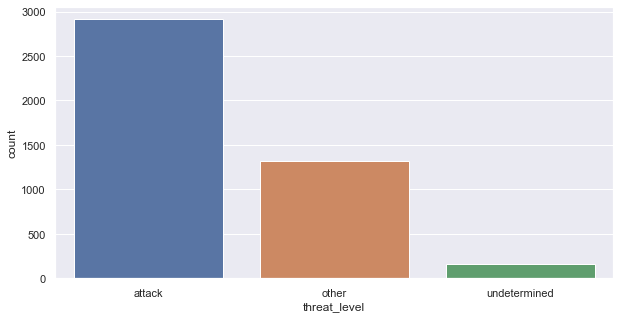

In [34]:
sns.countplot(x = "threat_level", data = df)

The different threat levels the people killed posed.

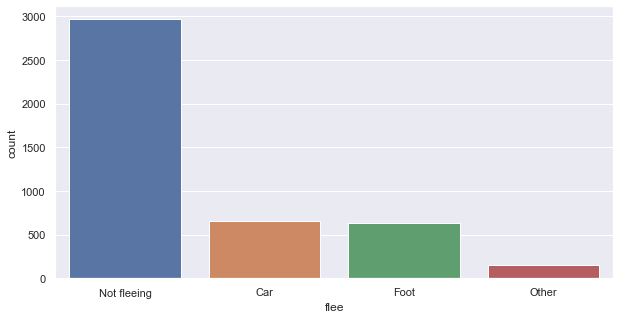

In [35]:
sns.countplot(x = "flee", data = df)

The cases of not fleeing are high, whereas the ones of fleeing are low.

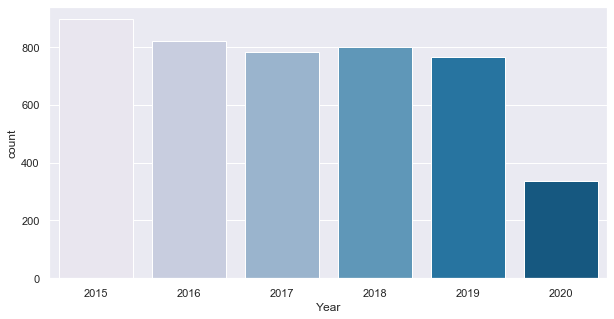

In [36]:
sns.countplot(x = "Year", data = df, palette = 'PuBu')

The shootings that occurred over the years. The 2020 data is less as it was only recorded from 2020 to June. 

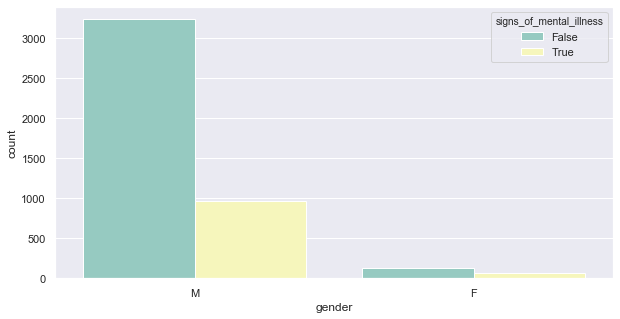

In [37]:
sns.countplot(x = "gender", hue = "signs_of_mental_illness",data = df, palette = 'Set3')

Gender and Signs of Mental Illnesses have little dependence on each other.

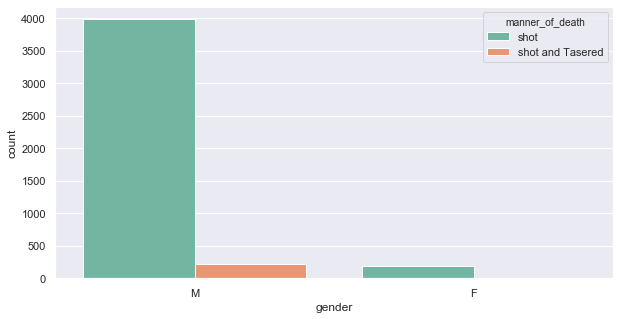

In [38]:
sns.countplot(x = "gender", hue = "manner_of_death",data = df, palette = 'Set2')

Only men were tasered and shot. This figure was not the case for females.

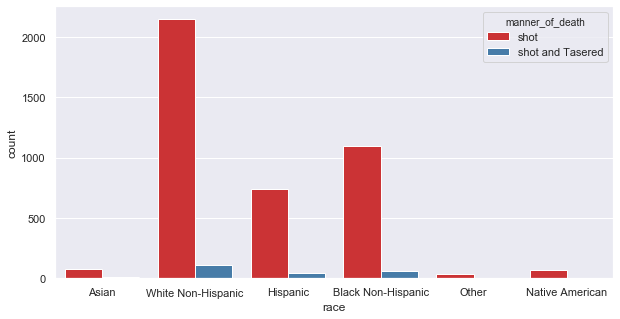

In [39]:
sns.countplot(x = "race", hue = "manner_of_death",data = df, palette = 'Set1')

The races have been tasered and shot.


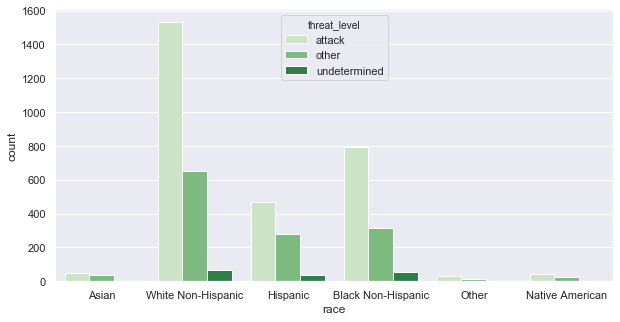

In [40]:
sns.countplot(x = "race", hue = "threat_level",data = df, palette = 'Greens')

The races showed mental illness and which were not showing mental illness.


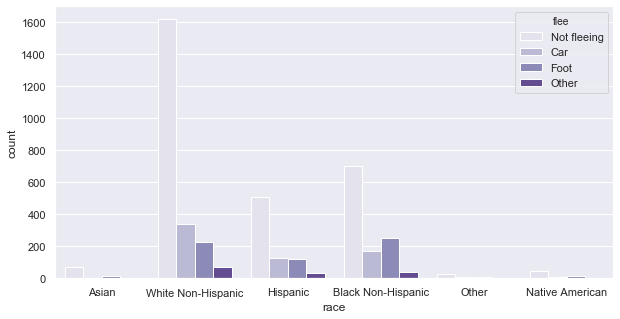

In [41]:
sns.countplot(x = "race", hue = "flee",data = df, palette = 'Purples')

The threat level posed by the people by race.


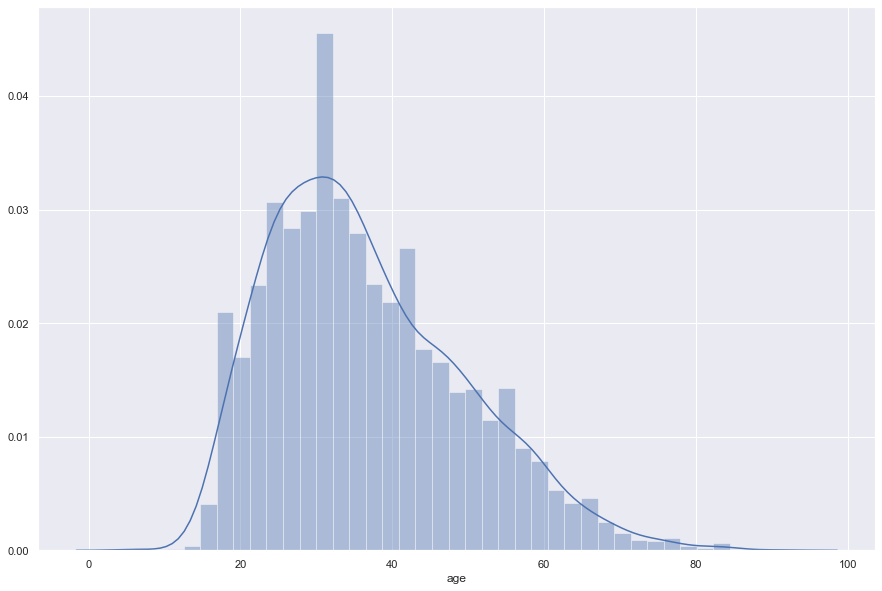

In [42]:
plt.figure(figsize=(15,10))
sns.distplot(df['age'])

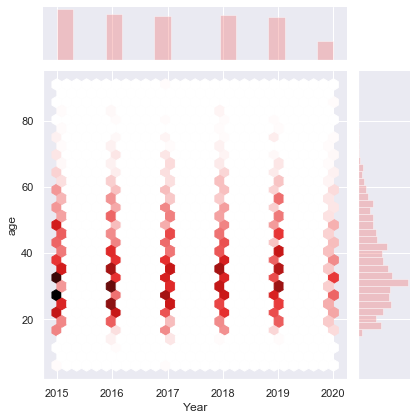

In [43]:
sns.axes_style('whitegrid')
sns.jointplot(x = df['Year'], y =df['age'], kind = 'hex',color = 'lightcoral')

The dependence of Age and Year. The black hexagonal values are present show that people are present more on average.

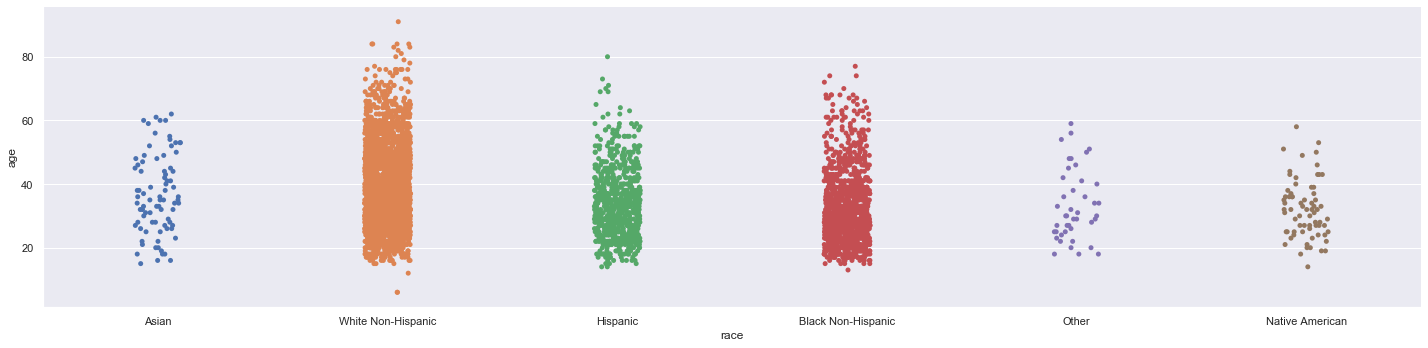

In [44]:
sns.catplot(x = 'race',y='age', kind = 'strip', data = df,aspect = 4)

Relation of race and age of the person killed.



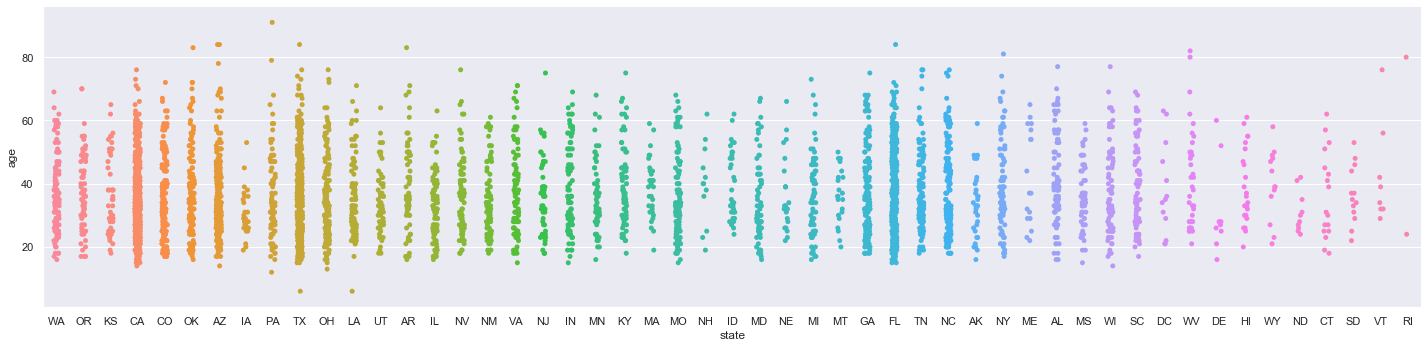

In [45]:
sns.catplot(x = 'state',y='age', kind = 'strip', data = df,aspect = 4)

Relation of race and state to which the person killed belonged.

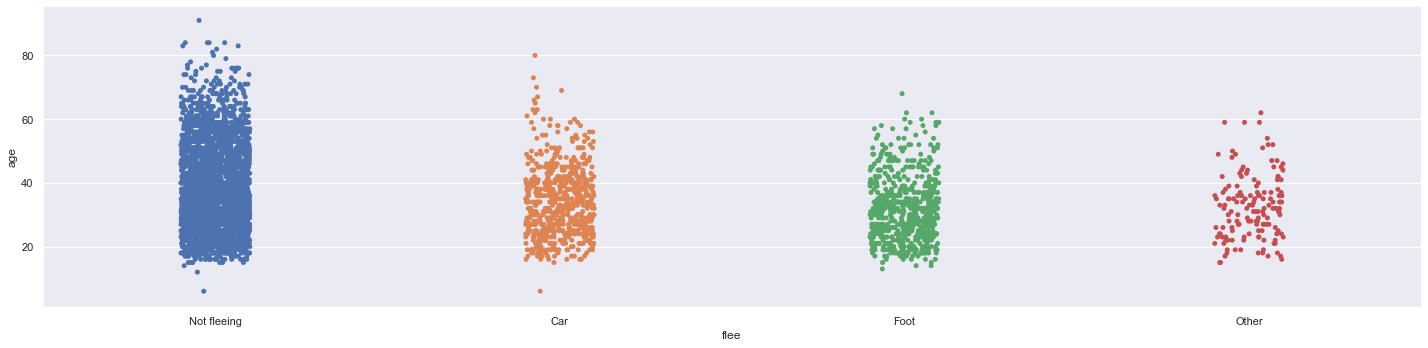

In [46]:
sns.catplot(x = 'flee',y='age', kind = 'strip', data = df,aspect = 4)

Relation of the attempt to flee and the age of the person killed.

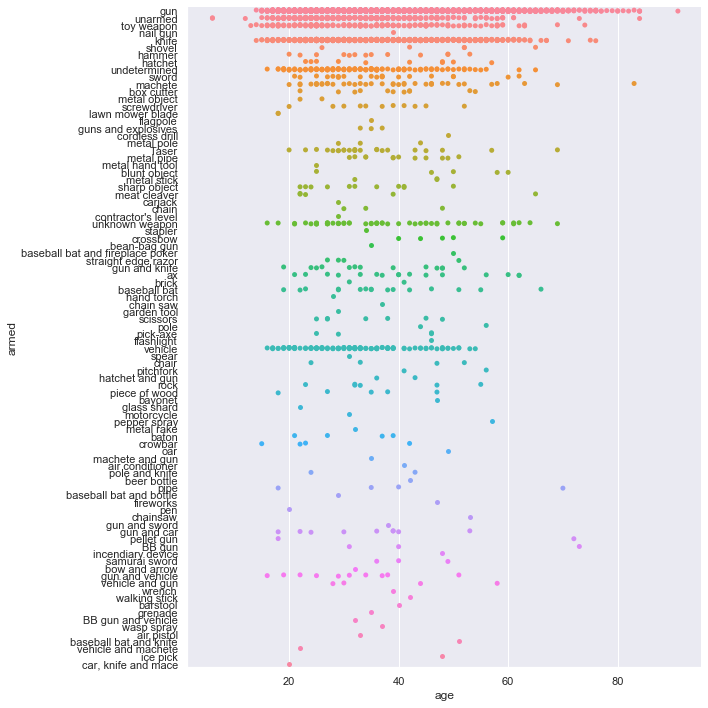

In [47]:
sns.catplot(x = 'age',y='armed', kind = 'strip', data = df,height = 10)

This figure shows whether the person was armed and the weapon carried at a particular age.

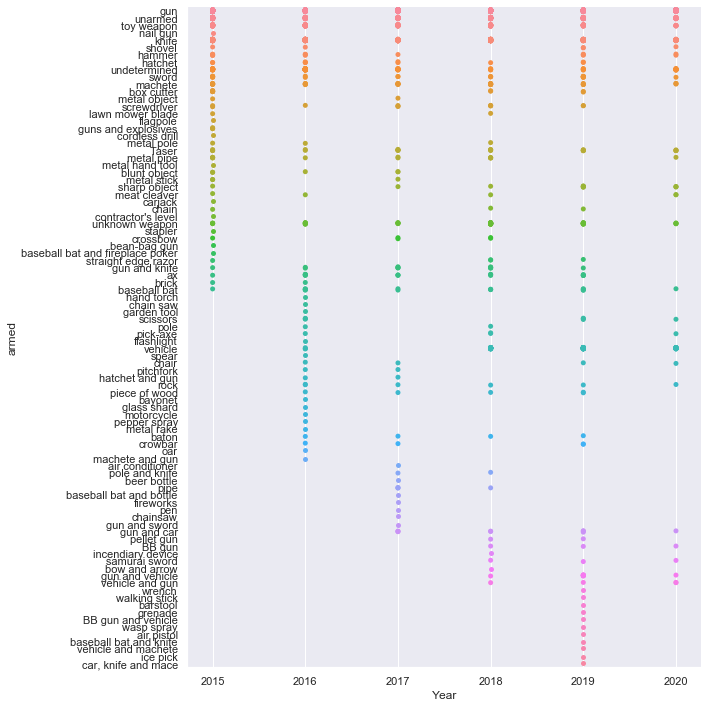

In [48]:
sns.catplot(x = 'Year',y='armed', kind = 'strip', data = df,height = 10)

The kind of weapon being brought and the Year in which such weapons were current.

In [49]:
df.city.unique()
city_crime = df.city.value_counts()
city_high_crime = [(city, city_crime[city]) for city in city_crime.index if city_crime[city] > 30]
city_high_crime

[('Los Angeles', 62),
 ('Phoenix', 60),
 ('Houston', 45),
 ('Las Vegas', 38),
 ('San Antonio', 34),
 ('Columbus', 33),
 ('Chicago', 31)]

In [50]:
df.groupby(['threat_level','armed','signs_of_mental_illness']).age.count().unstack(level=2)

signs_of_mental_illness          False  True 
threat_level armed                           
attack       BB gun                1.0    NaN
             BB gun and vehicle    1.0    NaN
             Taser                18.0    1.0
             air pistol            1.0    NaN
             ax                    2.0    2.0
...                                ...    ...
undetermined sword                 1.0    NaN
             toy weapon            4.0    NaN
             unarmed              30.0    6.0
             undetermined         58.0    3.0
             unknown weapon        7.0    1.0

[140 rows x 2 columns]

<Figure size 720x504 with 0 Axes>

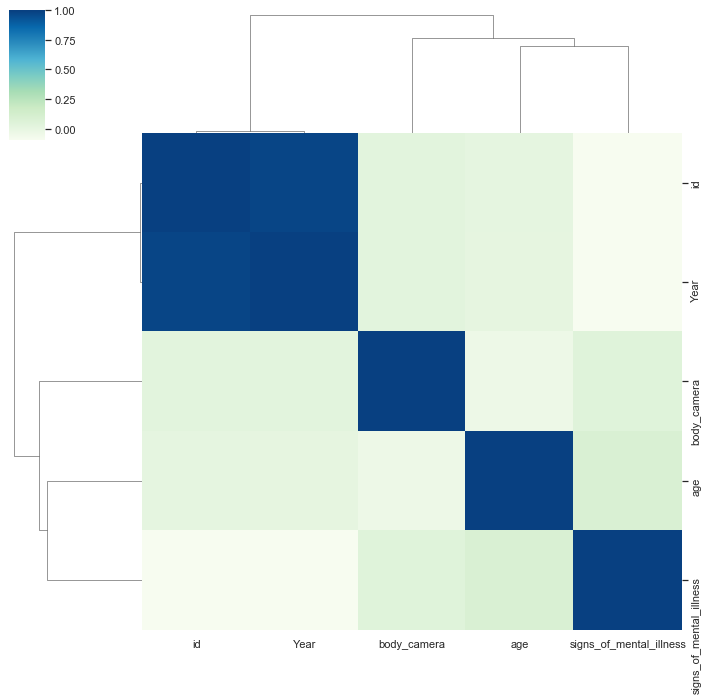

In [51]:
fig = plt.figure(figsize = (10,7))
sns.clustermap(df.corr(),cmap="GnBu")

In [52]:
pd.crosstab(df.age, df.body_camera, margins = True).style.background_gradient(cmap='OrRd')

body_camera,False,True,All
age,,,
6.0,1,1,2
12.0,1,0,1
13.0,1,0,1
14.0,1,2,3
15.0,8,4,12
16.0,21,6,27
17.0,39,3,42
18.0,78,8,86
19.0,62,11,73


In [53]:
df['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'UT', 'AR', 'IL', 'NV', 'NM', 'VA', 'NJ', 'IN', 'MN', 'KY',
       'MA', 'MO', 'NH', 'ID', 'MD', 'NE', 'MI', 'MT', 'GA', 'FL', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DC', 'WV', 'DE',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

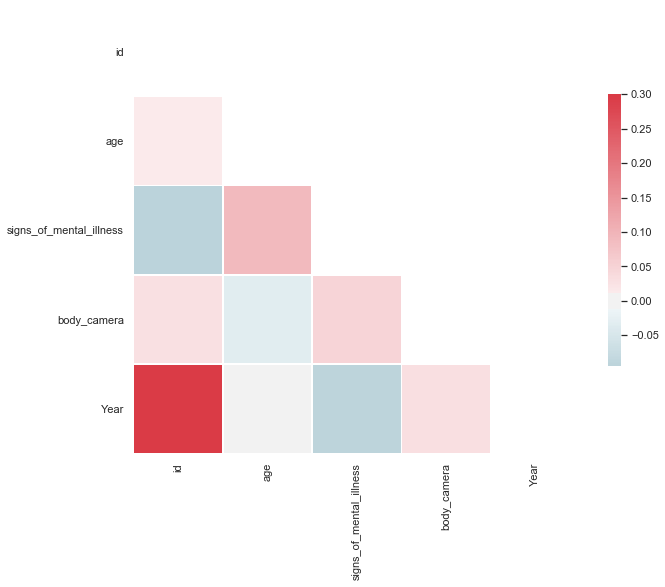

In [54]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

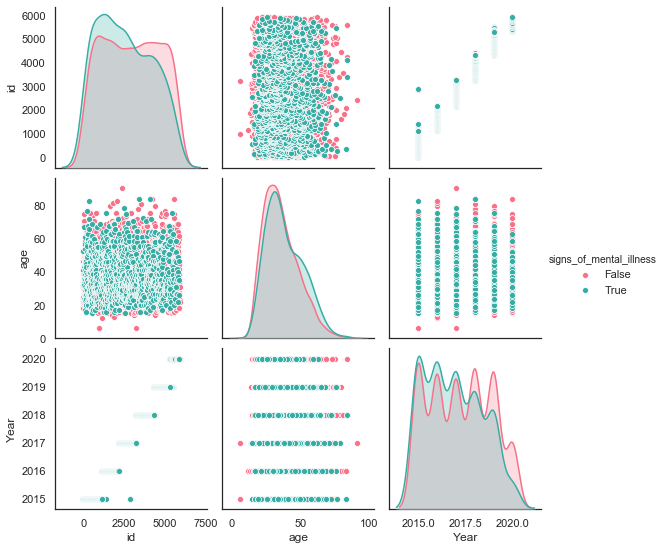

In [55]:
sns.pairplot(data=df, hue='signs_of_mental_illness', 
             vars= ['id', 'age', 'Year'],
            palette='husl')

In [56]:
corr = df.corr()
corr.style.background_gradient(cmap='PuBu')

,id,age,signs_of_mental_illness,body_camera,Year
id,1.000000,0.012273,-0.094969,0.029868,0.982516
age,0.012273,1.000000,0.090799,-0.032808,0.011144
signs_of_mental_illness,-0.094969,0.090799,1.000000,0.049242,-0.090859
body_camera,0.029868,-0.032808,0.049242,1.000000,0.030046
Year,0.982516,0.011144,-0.090859,0.030046,1.000000
